In [15]:
from pylab import *
import matplotlib.pyplot as plt
import os
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.image as gim
import pandas as pd

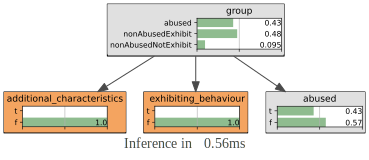

In [29]:
bn=gum.loadBN("/Users/ludivanleeuwen/simulationTest/FentonAbuseReplication.net")

ie=gum.LazyPropagation(bn)

gnb.showInference(bn,evs={'exhibiting_behaviour':'f', 'additional_characteristics':'f'})




In [30]:
gim.exportInference(model=bn, filename="FentonAbuse.pdf", engine=ie, evs={'exhibiting_behaviour':'f', 'additional_characteristics':'f'})

In [21]:
bn=gum.loadBN("/Users/ludivanleeuwen/simulationTest/experiments/GroteMarktPrivate/BNs/manualNetwork.net")
ie=gum.LazyPropagation(bn)


#gnb.showInference(bn,evs={'E_psych_report_1_0':1, 'E_camera_1':1, 'E_camera_seen_stealing_1_0':0, 'E_object_gone_0':1})
#gnb.showInference(bn)
gim.exportInference(model=bn, filename="manualNetwork.pdf", engine=ie, evs={})

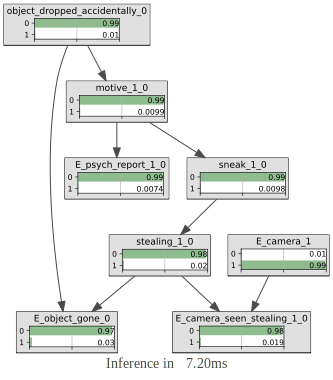

In [22]:
gnb.showInference(bn,evs={})



In [25]:
for node in bn.nodes():
    print(bn.cpt(node))


             ||  E_object_gone_0  |
steali|object||0        |1        |
------|------||---------|---------|
0     |0     || 1.0000  | 0.0000  |
1     |0     || 0.0000  | 1.0000  |
0     |1     || 0.0000  | 1.0000  |
1     |1     || 0.0000  | 1.0000  |


             ||  E_camera_seen_ste|
steali|E_came||0        |1        |
------|------||---------|---------|
0     |0     || 1.0000  | 0.0000  |
1     |0     || 1.0000  | 0.0000  |
0     |1     || 1.0000  | 0.0000  |
1     |1     || 0.0000  | 1.0000  |


      ||  E_psych_report_1_|
motive||0        |1        |
------||---------|---------|
0     || 1.0000  | 0.0000  |
1     || 0.2500  | 0.7500  |


  E_camera_1       |
0        |1        |
---------|---------|
 0.0100  | 0.9900  |


  object_dropped_ac|
0        |1        |
---------|---------|
 0.9900  | 0.0100  |


      ||  stealing_1_0     |
sneak_||0        |1        |
------||---------|---------|
0     || 0.9900  | 0.0100  |
1     || 0.0100  | 0.9900  |


      ||  sneak_1_0      

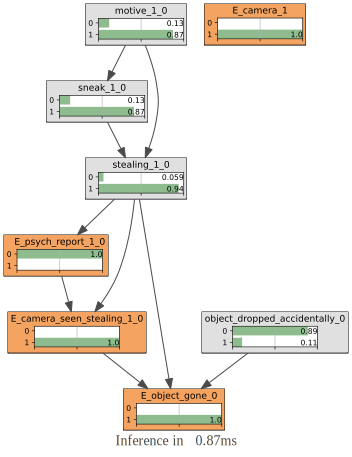

In [5]:
bn=gum.loadBN("/Users/ludivanleeuwen/simulationTest/experiments/GroteMarktPrivate/BNs/GroteMarktPrivate.net")
ie=gum.LazyPropagation(bn)
#gnb.showInference(bn,evs={})
gnb.showInference(bn,evs={'E_psych_report_1_0':0, 'E_camera_1':1, 'E_camera_seen_stealing_1_0':1, 'E_object_gone_0':1})

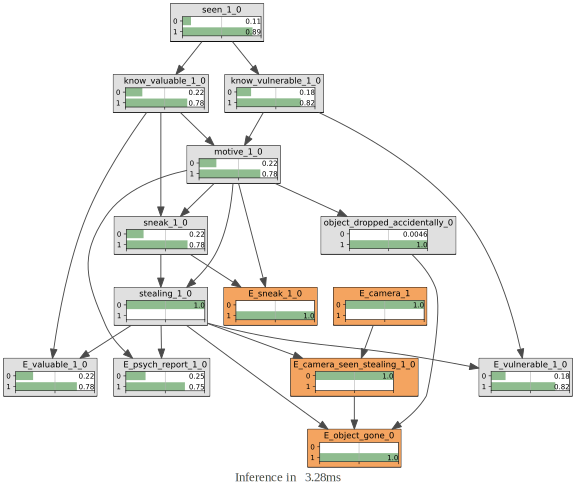

In [9]:
bn=gum.loadBN("/Users/ludivanleeuwen/simulationTest/experiments/GroteMarkt/BNs/GroteMarkt.net")
ie=gum.LazyPropagation(bn)
#gnb.showInference(bn,evs={})
gnb.showInference(bn,evs={'E_camera_1':0, 'E_camera_seen_stealing_1_0':0, 'E_sneak_1_0':1, 'E_object_gone_0':1})

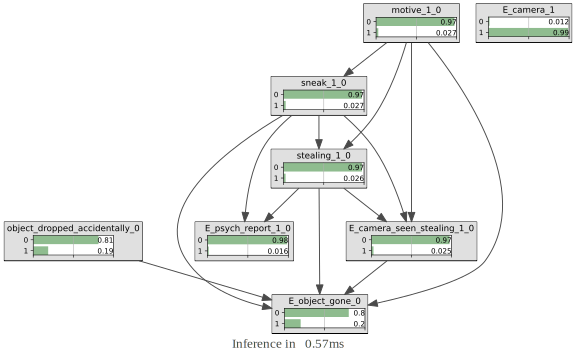

In [10]:
bn=gum.loadBN("/Users/ludivanleeuwen/simulationTest/experiments/GroteMarktPrivate/BNs/GroteMarktPrivate.net")
ie=gum.LazyPropagation(bn)
gnb.showInference(bn,evs={})

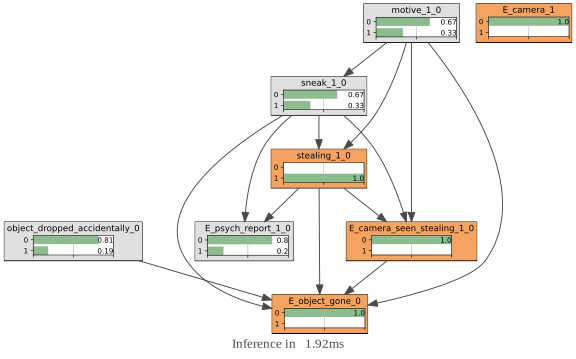

In [13]:
gnb.showInference(bn,evs={'E_camera_1':0, 'E_camera_seen_stealing_1_0':0, 'stealing_1_0':1, 'E_object_gone_0':0})

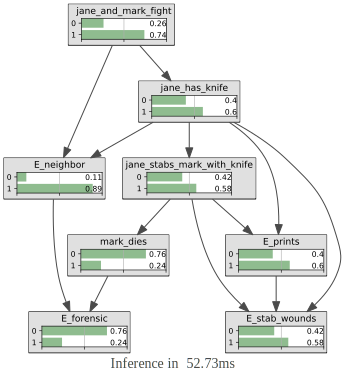

In [28]:
network = "/Users/ludivanleeuwen/simulationTest/experiments/WalkThrough/BNs/WalkThrough.net"
bn=gum.loadBN(network)
ie=gum.LazyPropagation(bn)
gnb.showInference(bn,evs={})



In [30]:
bn.cpt('E_neighbor')

(pyAgrum.Potential<double>@0x7f9072605cc0) 
             ||  E_neighbor       |
jane_h|jane_a||0        |1        |
------|------||---------|---------|
0     |0     || 0.4955  | 0.5045  |
1     |0     || 0.0033  | 0.9967  |
0     |1     || 0.0007  | 0.9993  |
1     |1     || 0.0002  | 0.9998  |

/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


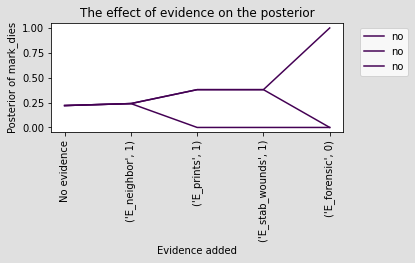

In [23]:
def progress(network_name, temporal_evidence):
    bn = gum.loadBN(network_name)
    ie = gum.LazyPropagation(bn)
    
    x = []
    y = []
    posterior_name = []


    event = temporal_evidence["events"]
    val = temporal_evidence["values"]
    output = temporal_evidence["output"][0]
    x.append("No evidence")
    y.append(round(ie.posterior(output)[1], 2))
    posterior_name.append(output)
    

    i = 0
    for i in range(0, len(event)):
        ie.addEvidence(event[i], val[i])
        x.append(str((event[i], val[i])))
        posterior_name.append(output)

        try:
            y.append(round(ie.posterior(output)[1], 2))
        except Exception:
            y.append("NA")

    otp = {}
    otp["evidence"] = x
    otp["posterior"] = y
    otp["posterior_name"] = posterior_name
    otp_pd = pd.DataFrame.from_dict(otp)
    return otp_pd

def plot_posterior_base_network_only(base_network, temporal_evidence):
    df = progress(base_network, temporal_evidence)
    flag = 0
    colors = ["#440154"]
    file = base_network
    param = file.split("_", 2)
    ax = plt.gca()

    if len(param) > 2:
        [base, dis, num] = param
        num = num[:-4]
        flag = 0
    else:
        base = file
        num = "no"
        flag = 1
    if flag == 1:
        df.rename(columns={"posterior": str(num)}, inplace=True)
        col = list(df.columns)
        df.plot(kind='line', x=col[0], y=col[1], color=colors[0], legend=num, title=base, ax=ax)
        plt.xticks(range(0, len(df["evidence"])), df["evidence"], rotation='vertical')
        # Tweak spacing to prevent clipping of tick-labels
        plt.subplots_adjust(right=0.8, bottom=0.5)
        ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
        plt.xlabel("Evidence added")
        plt.ylabel("Posterior of " + df["posterior_name"][0])
        plt.title("The effect of evidence on the posterior")
        


nw = "/Users/ludivanleeuwen/simulationTest/experiments/WalkThrough/BNs/WalkThrough.net"

d = {}
d["events"] = ["E_neighbor",
            "E_prints",
            "E_stab_wounds",
            "E_forensic" ]
d["output"] = ["mark_dies"]

for l in [[1, 1, 1, 1], [1, 0, 0, 0], [1, 1, 1, 0]]:
    d["values"] = l
    temporal_evidence = d
    plot_posterior_base_network_only(nw, temporal_evidence)
    





/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


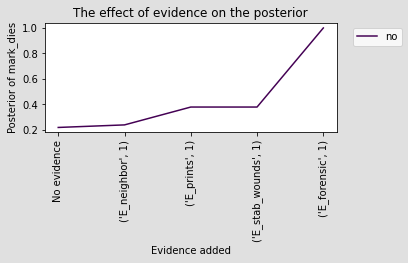

In [24]:
d["values"] = [1, 1, 1, 1]
temporal_evidence = d
plot_posterior_base_network_only(nw, temporal_evidence)
    

/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


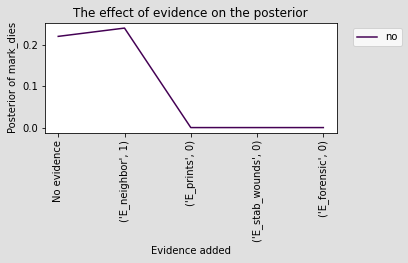

In [25]:
d["values"] = [1, 0, 0, 0]
temporal_evidence = d
plot_posterior_base_network_only(nw, temporal_evidence)

/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


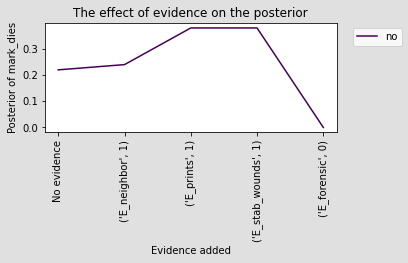

In [26]:
d["values"] = [1, 1, 1, 0]
temporal_evidence = d
plot_posterior_base_network_only(nw, temporal_evidence)

In [13]:
bn.cpt('know_valuable_1_0')

(pyAgrum.Potential<double>@0x7facf5638f30) 
      ||  know_valuable_1_0|
seen_1||0        |1        |
------||---------|---------|
0     || 0.9997  | 0.0003  |
1     || 0.5780  | 0.4220  |

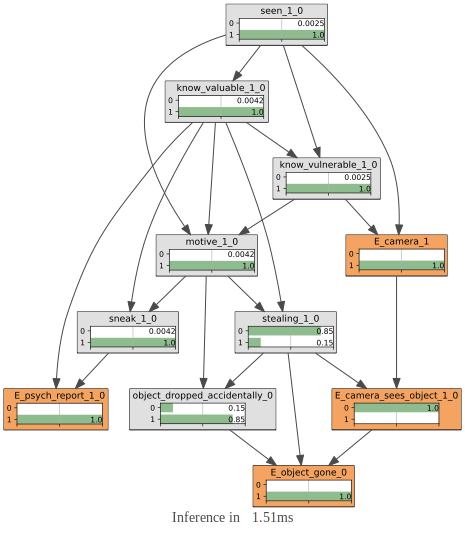

In [9]:
gnb.showInference(bn,evs={"E_camera_1":1, "E_object_gone_0":1, "E_psych_report_1_0":1, "E_camera_sees_object_1_0": 0})

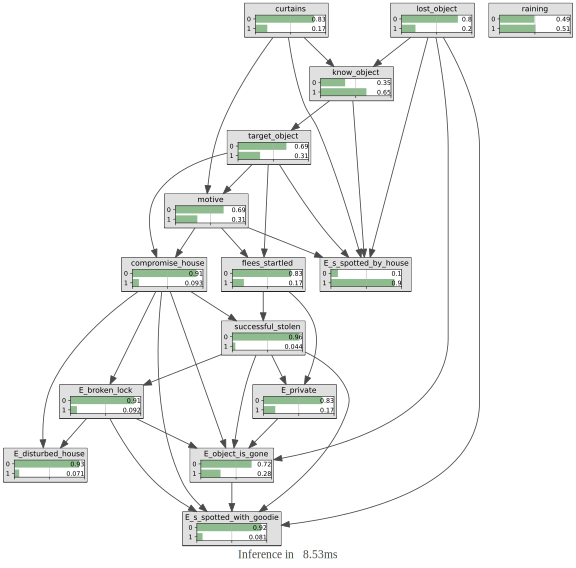

In [25]:
bn=gum.loadBN("/Users/ludivanleeuwen/simulationTest/experiments/StolenLaptop/BNs/StolenLaptop.net")
ie=gum.LazyPropagation(bn)
gnb.showInference(bn,evs={})

In [15]:
bn=gum.loadBN("/Users/ludivanleeuwen/simulationTest/experiments/VlekNetwork/BNs/KB1.net")
ie=gum.LazyPropagation(bn)
#gnb.showInference(bn,evs={'jane_stabs_mark_with_knife':0})
ie.addEvidence('jane_stabs_mark_with_knife',0)
ie.posterior('mark_dies')[1]


5.013902475151622e-07


  mark_dies        |
0        |1        |
---------|---------|
 1.0000  | 0.0000  |



In [69]:
bn=gum.loadBN("/Users/ludivanleeuwen/simulationTest/experiments/VlekNetwork/BNs/KB1.net")
ie=gum.LazyPropagation(bn)
ie.addAllTargets()
targets = ie.targets()
ie.addJointTarget(targets)
ie.jointPosterior(targets)



(pyAgrum.Potential<double>@0x7fb4f050a4e0) 
                    ||  jane_stabs_mark_w|
mark_d|jane_a|jane_h||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.2400  | 0.0000  |
1     |0     |0     || 0.0000  | 0.0000  |
0     |1     |0     || 0.0600  | 0.0000  |
1     |1     |0     || 0.0000  | 0.0000  |
0     |0     |1     || 0.5600  | 0.0000  |
1     |0     |1     || 0.0000  | 0.0000  |
0     |1     |1     || 0.1400  | 0.0000  |
1     |1     |1     || 0.0000  | 0.0000  |

In [24]:
bn=gum.loadBN("/Users/ludivanleeuwen/simulationTest/experiments/VlekNetwork/BNs/KB1.net")
print(bn.names())
ie=gum.LazyPropagation(bn)

ie.addAllTargets()
targets = ie.targets()
ie.addJointTarget(ie.targets())
ie.jointPosterior(ie.targets())

ie.addEvidence('jane_and_mark_fight', 1)
ie.eraseTarget('jane_and_mark_fight')
print(ie.evidenceJointImpact(ie.targets(), {'jane_and_mark_fight'} ))

ie.addAllTargets()
ie.addEvidence('jane_has_knife', 1)
ie.eraseTarget('jane_has_knife')
print(ie.evidenceJointImpact(ie.targets(), {'jane_has_knife'}))


ie.addAllTargets()
ie.eraseTarget('jane_stabs_mark_with_knife')
ie.addEvidence('jane_stabs_mark_with_knife', 0)



print(ie.evidenceJointImpact(ie.targets(), {'jane_stabs_mark_with_knife':0}))

print(ie.posterior('mark_dies'))



print(ie.posterior('jane_has_knife'))



#gnb.showInference(bn,evs={})
#gnb.showInference(bn,evs={'jane_has_knife':1, 'jane_stabs_mark_with_knife':1})


{'mark_dies', 'jane_stabs_mark_with_knife', 'jane_has_knife', 'jane_and_mark_fight'}

                    ||  mark_dies        |
jane_h|jane_s|jane_a||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.2959  | 0.0000  |
1     |0     |0     || 0.7041  | 0.0000  |
0     |1     |0     || 0.0000  | 0.0000  |
1     |1     |0     || 0.0000  | 0.0000  |
0     |0     |1     || 0.2959  | 0.0000  |
1     |0     |1     || 0.6908  | 0.0000  |
0     |1     |1     || 0.0000  | 0.0000  |
1     |1     |1     || 0.0040  | 0.0094  |


                    ||  mark_dies        |
jane_a|jane_s|jane_h||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 0.7913  | 0.0000  |
1     |0     |0     || 0.2087  | 0.0000  |
0     |1     |0     || 0.0000  | 0.0000  |
1     |1     |0     || 0.0000  | 0.0000  |
0     |0     |1     || 0.7913  | 0.0000  |
1     |0     |1     || 0.2048  | 0.0000  |
0     |1     |1     || 0.0000  | 0.0000  |
1     |1 

In [59]:
ie.addEvidence('jane_stabs_mark_with_knife', 1)
ie.makeInference()
ie.posterior('mark_dies')
#gnb.showPosterior(bn, evs={'jane_stabs_mark_with_knife':1}, target='jane_has_knife')

InvalidArgument: [pyAgrum] Invalid argument:  node 2 already has an evidence. Please use chgEvidence().

In [35]:
gnb.showInference(bn, evs={'jane_stabs_mark_with_knife':1})


Exception: [pyAgrum] Several evidence/CPT are incompatible together (proba=0): some evidence entered into the Bayes net are incompatible (their joint proba = 0)

In [22]:
ie=gum.LazyPropagation(bn)
print(bn.cpt('jane_stabs_mark_with_knife'))
gnb.showInference(bn,evs={'jane_has_knife': 0})
print(ie.posterior('jane_stabs_mark_with_knife'))
ie.addEvidence('jane_stabs_mark_with_knife', 1)
print(ie.posterior('jane_stabs_mark_with_knife'))



NotFound: [pyAgrum] Object not found: No element with the key <jane_stabs_mark_with_knife>

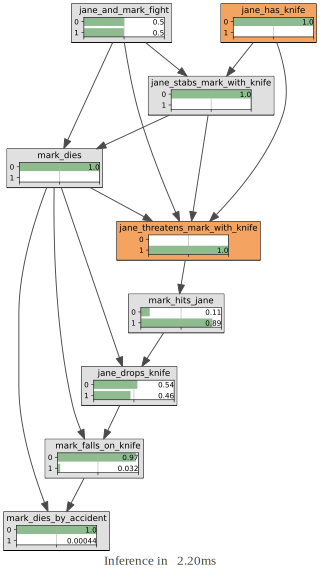

In [14]:
bn=gum.loadBN("/Users/ludivanleeuwen/simulationTest/experiments/VlekNetwork/BNs/KBfull.net")
ie=gum.LazyPropagation(bn)
gnb.showInference(bn,evs={'jane_has_knife': 0, 'jane_threatens_mark_with_knife':1})

In [64]:
ie.evidenceImpact("mark_dies",["jane_and_mark_fight","jane_has_knife","jane_stabs_mark_with_knife"])

(pyAgrum.Potential<double>@0x7fdaa00c6050) 
      ||  mark_dies        |
jane_s||0        |1        |
------||---------|---------|
0     || 1.0000  | 0.0000  |
1     || 0.2723  | 0.7277  |

In [63]:
print(gum.getPosterior(bn,{'jane_stabs_mark_with_knife':1}, 
                      'mark_dies').tolist())

ie.chgEvidence('jane_stabs_mark_with_knife', [0.1, 0.1])
print(ie.posterior('mark_dies'))

ie.chgEvidence('jane_stabs_mark_with_knife', 1)
print(ie.posterior('mark_dies'))

#gnb.showInference(bn)
#ie.addEvidence('jane_stabs_mark_with_knife', 1)
#ie.evidenceImpact('mark_dies', evs={ 'jane_has_knife','jane_and_mark_fight'})



[0.27227699756622314, 0.7277230024337769]


InvalidArgument: [pyAgrum] Invalid argument: 2 has no evidence. Please use addEvidence().

In [25]:
import time

r = range(0, 100, 2)
xs = [x/100.0 for x in r]
tf = time.time()

ys = []
val = 0
for x in r:
    print(x/100.0)
    
    val = gum.getPosterior(bn, {'jane_stabs_mark_with_knife':0.5},'mark_dies').tolist()
    print(val)
    ys.append(val)
    
delta=time.time()-tf
p=plot(xs,ys)
legend(p, [bn.variableFromName('mark_dies').label(i)
          for i in range(bn,variableFromName('mark_dies').domainSize())],loc=7);
title('mark dies (100 inferences in %d ms)'%delta);
ylabel('posterior probability');
xlabel('evidence on jane stabs mark with knife');

0.0


TypeError: Wrong number or type of arguments for overloaded function 'VariableElimination_addEvidence'.
  Possible C/C++ prototypes are:
    gum::VariableElimination< double >::addEvidence(gum::NodeId const,gum::Idx const)
    gum::VariableElimination< double >::addEvidence(std::string const &,gum::Idx const)
    gum::VariableElimination< double >::addEvidence(gum::NodeId const,std::string const &)
    gum::VariableElimination< double >::addEvidence(std::string const &,std::string const &)
    gum::VariableElimination< double >::addEvidence(gum::NodeId const,std::vector< double,std::allocator< double > > const &)
    gum::VariableElimination< double >::addEvidence(std::string const &,std::vector< double,std::allocator< double > > const &)


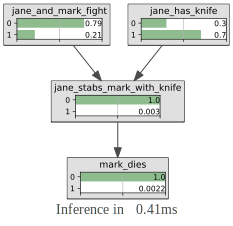

In [44]:

#bn=gum.loadBN("/Users/ludivanleeuwen/simulationTest/experiments/GroteMarkt/BNs/GroteMarkt.net")
bn=gum.loadBN("/Users/ludivanleeuwen/simulationTest/experiments/VlekNetwork/BNs/KB1.net")
ie=gum.LazyPropagation(bn)
gnb.showInference(bn,evs={})
#gim.exportInference(model=bnK2, filename="Report/images/Kb.pdf", engine=ie, evs={})

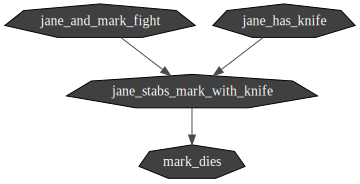

In [45]:


cr = gum.CredalNet(bn, bn)
gnb.show(cr)
#gnb.flow.row(bn,gnb.getInference(bn))


cr.bnToCredal(beta=1e-10,oneNet=False)
cr.computeBinaryCPTMinMax()
#print(cr)




** pyAgrum** For better visualizations, please install matplotlib-inline.

jane_and_mark_fight:Labelized(<0,1>)
<> : [[0.791098 , 0.208902] , [0.786411 , 0.213589]]

jane_has_knife:Labelized(<0,1>)
<> : [[0.361184 , 0.638816] , [0.270173 , 0.729827]]

jane_stabs_mark_with_knife:Labelized(<0,1>)
<jane_has_knife:0|jane_and_mark_fight:0> : [[0.999989 , 1.06282e-05] , [0.998301 , 0.00169886]]
<jane_has_knife:1|jane_and_mark_fight:0> : [[0.999995 , 4.49443e-06] , [0.998307 , 0.00169268]]
<jane_has_knife:0|jane_and_mark_fight:1> : [[0.99996 , 3.99933e-05] , [0.998272 , 0.00172846]]
<jane_has_knife:1|jane_and_mark_fight:1> : [[0.979544 , 0.0204556] , [0.977688 , 0.0223117]]

mark_dies:Labelized(<0,1>)
<jane_stabs_mark_with_knife:0> : [[0.999995 , 5.00663e-06] , [0.998307 , 0.0016932]]
<jane_stabs_mark_with_knife:1> : [[0.351478 , 0.648522] , [0.242644 , 0.757356]]




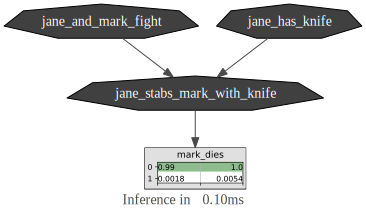

In [1]:
from pylab import *
import matplotlib.pyplot as plt
import os
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.image as gim


#bn=gum.loadBN("/Users/ludivanleeuwen/simulationTest/experiments/GroteMarkt/BNs/GroteMarkt.net")

bn=gum.loadBN("/Users/ludivanleeuwen/simulationTest/experiments/VlekNetwork/BNs/KB1.net")



cr=gum.CredalNet(bn,bn)
cr.bnToCredal(beta=0.0001,oneNet=False)
print(cr)
cr.computeBinaryCPTMinMax()
ielbp=gum.CNLoopyPropagation(cr)  
gnb.showInference(cr,targets={"mark_dies"},engine=ielbp)



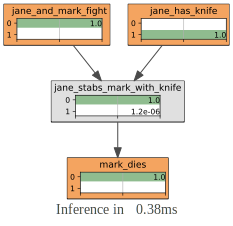

In [2]:
#gnb.showInference(bn,evs={"jane_and_mark_fight":1, "jane_has_knife":1, "jane_stabs_mark_with_knife":1, "mark_dies":1})
ie=gum.LazyPropagation(bn)
ie.posterior("jane_has_knife")
gnb.showInference(bn,evs={"mark_dies":0, 
                          #"jane_stabs_mark_with_knife":0, 
                          "jane_and_mark_fight":0,
                          "jane_has_knife":1})
#gnb.showInference(bn,evs={"jane_has_knife":1})





In [24]:
bn.cpt("jane_and_mark_fight")


(pyAgrum.Potential<double>@0x7f8fa9cc4c50) 
  jane_and_mark_fig|
0        |1        |
---------|---------|
 1.0000  | 0.0000  |

In [25]:
bn.cpt("jane_has_knife")

(pyAgrum.Potential<double>@0x7f8fa9cc23d0) 
  jane_has_knife   |
0        |1        |
---------|---------|
 0.5000  | 0.5000  |

In [26]:
bn.cpt("mark_dies")

(pyAgrum.Potential<double>@0x7f8fa9cef780) 
      ||  mark_dies        |
jane_s||0        |1        |
------||---------|---------|
0     || 1.0000  | 0.0000  |
1     || 0.5000  | 0.5000  |

In [27]:
bn.cpt("jane_stabs_mark_with_knife")

(pyAgrum.Potential<double>@0x7f8fa9cd2d60) 
             ||  jane_stabs_mark_w|
jane_a|jane_h||0        |1        |
------|------||---------|---------|
0     |0     || 1.0000  | 0.0000  |
1     |0     || 1.0000  | 0.0000  |
0     |1     || 1.0000  | 0.0000  |
1     |1     || 1.0000  | 0.0000  |